In [2]:
# Import moduls
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

import itertools
import random

from core.preprocessing import decoding_numbers, train_val_test_split

from imblearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV


In [3]:
# Load data and transform numbers to words
path = '../data/raw/2011 Census Microdata Teaching File.csv'
df = pd.read_csv(path)
df_decoded =  decoding_numbers(df)
# Train - Validation - Test split
features_train, target_train, features_val, target_val, features_test, target_test = train_val_test_split(df_decoded.iloc[:,:-1], df_decoded.iloc[:,-1])

/var/folders/cf/zk30004x3v91314p4gt9qxlr0000gp/T/ipykernel_79326/1511614620.py:3: DtypeWarning: Columns (0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


Approximated Social Grade
C1                  115117
No code required     89357
DE                   89041
AB                   59321
C2                   57376
Name: count, dtype: int64


<BarContainer object of 5 artists>

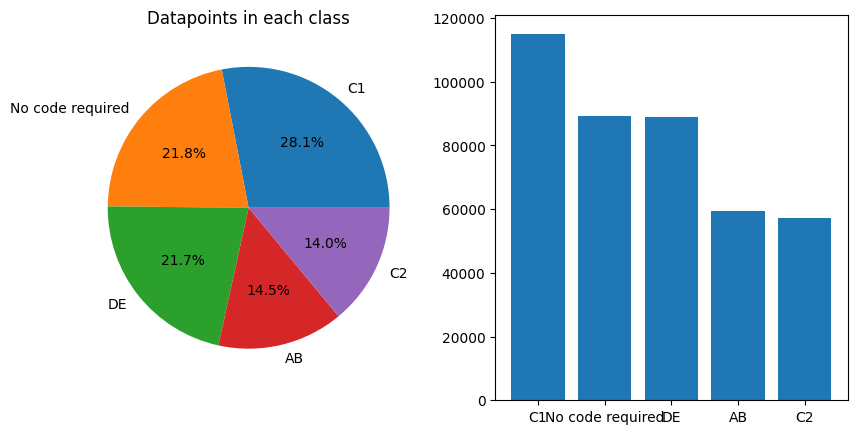

In [3]:
print(target_train.value_counts())
fig_pie, ax_pie = plt.subplots(nrows=1, ncols=2, figsize=(10,5));
ax_pie[0].pie(x=target_train.value_counts().values, labels=target_train.value_counts().index, 
           radius=1, autopct='%1.1f%%')
ax_pie[0].set_title('Datapoints in each class')
ax_pie[1].bar(x=target_train.value_counts().index, height=target_train.value_counts().values)